In [11]:
!pip install matplotlib seaborn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
def preprocess_tweet(tweet):
    # Remove URLs, mentions, and hashtags
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'@\w+|#\w+', '', tweet)

    # Convert to lowercase
    tweet = tweet.lower()

    # Remove punctuation and special characters
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Remove stop words and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tweet = ' '.join([lemmatizer.lemmatize(word) for word in tweet.split() if word not in stop_words])

    return tweet

# Load the tweets dataset, specifying the encoding and no header
tweets_df = pd.read_csv('tweet.csv', encoding='latin-1', header=None)  # header=None tells pandas there are no headers

# Assign column names
tweets_df.columns = ['id', 'timestamp', 'date', 'query', 'user', 'tweet'] # Replace with your actual column order

# Apply preprocessing to the 'tweet' column
tweets_df['text'] = tweets_df['tweet'].apply(preprocess_tweet)

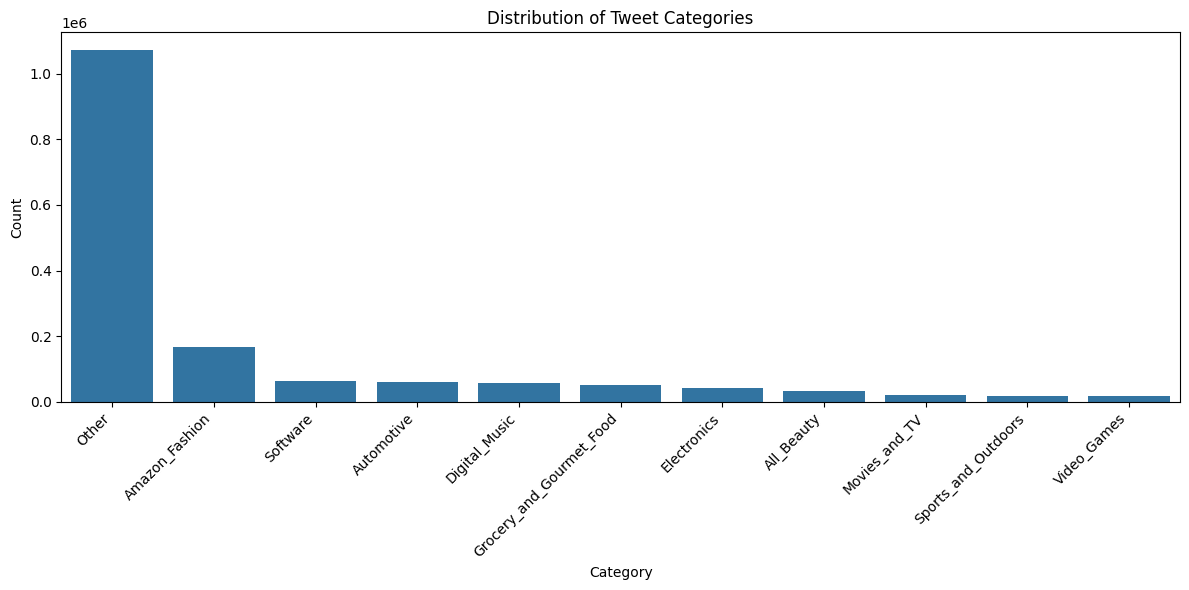

In [16]:
def assign_category(tweet):
    categories = {
        "All_Beauty": ["beauty", "makeup", "cosmetics", "skincare", "haircare", "fragrance", "perfume", "nail", "salon", "spa", "lotion", "cream", "lipstick", "eyeliner", "mascara", "foundation", "blush", "eyeshadow", "shampoo", "conditioner", "hairstyling", "manicure", "pedicure", "facial", "massage", "waxing", "sephora", "ulta", "mac", "maybelline", "loreal", "revlon", "clinique", "este lauder", "lancome"],
        "Amazon_Fashion": ["fashion", "clothing", "shoes", "accessories", "dress", "shirt", "pants", "jeans", "jacket", "coat", "handbag", "jewelry", "watch", "sunglasses", "style", "trend", "outfit", "apparel", "footwear", "sneaker", "heel", "boot", "sandal", "scarf", "belt", "hat", "bag", "purse", "wallet", "necklace", "earring", "bracelet", "ring", "nike", "adidas", "puma", "zara", "h&m", "forever 21", "levi's", "ralph lauren", "gucci", "prada", "louis vuitton"],
        "Automotive": ["car", "vehicle", "auto", "engine", "tire", "wheel", "brake", "repair", "maintenance", "driving", "road", "travel", "automobile", "truck", "suv", "sedan", "coupe", "sports car", "electric car", "hybrid car", "gasoline", "diesel", "mileage", "fuel", "transmission", "steering", "suspension", "airbag", "seatbelt", "navigation", "gps", "tesla", "toyota", "honda", "ford", "chevrolet", "bmw", "mercedes-benz", "audi", "volkswagen"],
        "Electronics": ["electronics", "gadget", "phone", "laptop", "computer", "tablet", "camera", "tv", "speaker", "headphone", "charger", "battery", "smartphone", "android", "ios", "iphone", "samsung", "google", "apple", "dell", "hp", "lenovo", "asus", "acer", "sony", "canon", "nikon", "bose", "jbl", "beats", "anker", "belkin"],
        "Digital_Music": ["music", "song", "album", "artist", "band", "singer", "concert", "streaming", "spotify", "apple music", "mp3", "audio", "playlist", "genre", "rock", "pop", "hip hop", "classical", "jazz", "country", "electronic", "dance", "sound", "melody", "rhythm", "instrument", "guitar", "piano", "drums", "vocals", "microphone"],
        "Software": ["software", "program", "app", "code", "development", "programming", "web", "mobile", "database", "cloud", "python", "java", "application", "website", "design", "coding", "algorithm", "data", "security", "cybersecurity", "artificial intelligence", "machine learning", "deep learning", "microsoft", "google", "apple", "amazon", "facebook", "oracle", "salesforce", "adobe"],
        "Sports_and_Outdoors": ["sport", "outdoor", "fitness", "hiking", "running", "cycling", "swimming", "yoga", "gym", "camping", "fishing", "hunting", "football", "basketball", "baseball", "soccer", "tennis", "golf", "cricket", "hockey", "volleyball", "training", "exercise", "workout", "equipment", "gear", "apparel", "shoes", "nike", "adidas", "under armour", "reebok", "columbia", "patagonia", "north face"],
        "Video_Games": ["game", "gaming", "console", "playstation", "xbox", "nintendo", "pc gaming", "steam", "online", "multiplayer", "controller", "virtual reality", "video game", "esports", "streamer", "twitch", "youtube", "action", "adventure", "rpg", "strategy", "shooter", "simulation", "sports", "racing", "puzzle", "fortnite", "call of duty", "league of legends", "minecraft", "grand theft auto", "fifa", "madden"],
        "Grocery_and_Gourmet_Food": ["food", "grocery", "gourmet", "recipe", "cooking", "baking", "restaurant", "cafe", "meal", "dinner", "lunch", "breakfast", "organic", "vegan", "vegetarian", "produce", "meat", "seafood", "dairy", "bakery", "snacks", "beverages", "coffee", "tea", "wine", "beer", "chocolate", "cheese", "pasta", "rice", "bread", "cereal", "fruits", "vegetables", "whole foods", "trader joe's", "walmart", "target", "kroger", "amazon fresh", "instacart"],
        "Movies_and_TV": ["movie", "film", "tv", "series", "cinema", "netflix", "hulu", "amazon prime", "actor", "actress", "director", "trailer", "drama", "comedy", "action", "adventure", "sci-fi", "fantasy", "horror", "thriller", "romance", "documentary", "animation", "anime", "superhero", "marvel", "dc", "disney", "pixar", "hbo", "showtime", "starz", "amc", "fx", "cnn", "fox", "nbc", "cbs", "abc"]
    }
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in tweet:
                return category
    # Return 'Other' if no category is found

    return 'Other'

# Load the tweets dataset using the correct encoding
tweets_df = pd.read_csv('tweet.csv', encoding='latin-1', header=None)
tweets_df.columns = ['id', 'timestamp', 'date', 'query', 'user', 'tweet']

# Preprocess the tweets
tweets_df['text'] = tweets_df['tweet'].apply(preprocess_tweet)

# Assign categories using the function
tweets_df['category'] = tweets_df['text'].apply(assign_category)

# Create a DataFrame with category counts
category_counts = tweets_df['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Visualize category counts using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Distribution of Tweet Categories')
plt.tight_layout()
plt.show()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tweets_df['text'], tweets_df['category'], test_size=0.2, random_state=42)


In [17]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [18]:
# Predict categories for the test set
y_pred = classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.878609375


In [19]:
# Function to save the model and vectorizer
def save_model_and_vectorizer(classifier, vectorizer):
  import pickle
  with open('tweet_classifier.pkl', 'wb') as f:
      pickle.dump(classifier, f)
  with open('tfidf_vectorizer.pkl', 'wb') as f:
      pickle.dump(vectorizer, f)

In [28]:
# Funktion zur Vorhersage der Tweet-Kategorie
def predict_tweet_category(tweet):
  import pickle
  # Lade den Klassifikator und den Vektorisierer
  with open('tweet_classifier.pkl', 'rb') as f:
      classifier = pickle.load(f)
  with open('tfidf_vectorizer.pkl', 'rb') as f:
      vectorizer = pickle.load(f)

  # Import the preprocess_tweet function if it's in a different file/cell
  from IPython.display import display # This line ensures the current cell is displayed
                                     # after execution, preventing issues with function
                                     # visibility across cells in a notebook environment
  from __main__ import preprocess_tweet # This import specifically imports the
                                        # preprocess_tweet function that might be defined
                                        # earlier in the IPython notebook session.

  # Check if the input is a string
  if not isinstance(tweet, str):
      raise TypeError("Input 'tweet' must be a string.")

  # Vorverarbeiten des Tweets, ähnlich wie bei tweets_df['tweet'].apply(preprocess_tweet)
  processed_tweet = preprocess_tweet(tweet)

  # Transformiere den Tweet mit dem Vektorisierer
  tweet_vec = vectorizer.transform([processed_tweet])

  # Sage die Kategorie voraus
  predicted_category = classifier.predict(tweet_vec)[0]

  return predicted_category

In [29]:
# Call the save function to save your model and vectorizer
save_model_and_vectorizer(classifier, vectorizer)

# Example usage of the prediction function
new_tweet = "I love this new lipstick!"
predicted_category = predict_tweet_category(new_tweet)
print(f"Predicted category: {predicted_category}")

Predicted category: Other
